#**CLASIFICADOR DE IMÁGENES: PIEDRA, PAPEL, TIJERA**

> ![picture](https://drive.google.com/uc?id=1ycFBHB-PfEYa9YJjWr3DeCNxc0a8wtzF)

###Elaboración de un clasificador multiclase a partir de un conjunto de imágenes correspondientes al juego "*Piedra, Papel, Tijera*".

---

### Curso *Deep Learning para Visión por Computador*. Curso 2019/2020.
### Escuela Superior de Informática de Ciudad Real (UCLM).

---

###**Rubén Márquez Villalta**
###**Antonio Manjavacas Lucas**

Primero, realizamos la carga de las librerías a utilizar:

In [1]:
!pip install livelossplot --quiet

%tensorflow_version 2.x

from os import scandir, getcwd, path, listdir
from os.path import abspath

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

import numpy as np
import seaborn as sns

from keras.applications.vgg16 import VGG16
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.models import model_from_yaml

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
from livelossplot import PlotLossesKeras
from IPython.display import clear_output
from random import sample
from shutil import copy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Uso de drive:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd 'drive/My Drive/Curso_Deep_Learning/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Curso_Deep_Learning


Almacenamos las rutas a los directorios:

In [0]:
PATH_DATA = path.join('.', 'data')

PATH_DATA_TIJERAS = path.join(PATH_DATA, 'tijera')
PATH_DATA_PIEDRAS = path.join(PATH_DATA, 'piedra')
PATH_DATA_PAPELES = path.join(PATH_DATA, 'papel')

PATH_TRAIN = path.join(PATH_DATA, 'train')
PATH_TEST = path.join(PATH_DATA, 'test')
PATH_VALIDATION = path.join(PATH_DATA, 'validation')

# Directorios en train
PATH_TRAIN_TIJERAS = path.join(PATH_TRAIN, 'tijera')
PATH_TRAIN_PIEDRAS = path.join(PATH_TRAIN, 'piedra')
PATH_TRAIN_PAPELES = path.join(PATH_TRAIN, 'papel')

# Directorios en test
PATH_TEST_TIJERAS = path.join(PATH_TEST, 'tijera')
PATH_TEST_PIEDRAS = path.join(PATH_TEST, 'piedra')
PATH_TEST_PAPELES = path.join(PATH_TEST, 'papel')

# Directorios en validación
PATH_VALIDATION_TIJERAS = path.join(PATH_VALIDATION, 'tijera')
PATH_VALIDATION_PIEDRAS = path.join(PATH_VALIDATION, 'piedra')
PATH_VALIDATION_PAPELES = path.join(PATH_VALIDATION, 'papel')

#**1. AUMENTO DEL CONJUNTO DE IMÁGENES DE MANERA ARTIFICIAL**

Funciones que usaremos más adelante:

In [0]:
# Listar los archivos de un directorio
def ls(ruta):
    return [abspath(arch.path) for arch in scandir(ruta) if arch.is_file()]

# Imprimir por pantalla una imagen
def plotImage(img_name):
    clear_output(wait=True)
    img = mpimg.imread(img_name)
    imgplot = plt.imshow(img)
    plt.show()

Mostramos el tamaño del conjunto de datos:

In [5]:
num_tijeras_dt = len(listdir(PATH_DATA_TIJERAS))
num_piedras_dt = len(listdir(PATH_DATA_PIEDRAS))
num_papeles_dt = len(listdir(PATH_DATA_PAPELES))

print("Número total de imágenes:", num_tijeras_dt + num_piedras_dt + num_papeles_dt)
print("Número total de imágenes de tijeras:", num_tijeras_dt)
print("Número total de imágenes de piedras:", num_piedras_dt)
print("Número total de imágenes de papeles:", num_papeles_dt)

Número total de imágenes: 228
Número total de imágenes de tijeras: 76
Número total de imágenes de piedras: 76
Número total de imágenes de papeles: 76


Aumentamos el conjunto de datos creando 5 imagenes nuevas (transformadas) por cada imagen original:

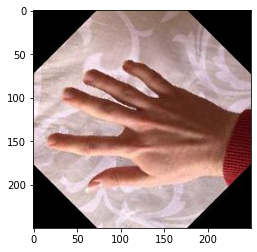

In [6]:
def upsampling(ruta):
    counter_name = 0

    for img_name in ls(ruta):
        im = Image.open(img_name)

        # Aplicar FLIP_LEFT_RIGHT
        out_im = im.transpose(Image.FLIP_LEFT_RIGHT)
        nueva_ruta = path.join(ruta, str(counter_name) + '.jpg')
        out_im.save(nueva_ruta)
        counter_name += 1
        plotImage(nueva_ruta)

        # Aplicar FLIP_TOP_BOTTOM
        out_im = im.transpose(Image.FLIP_TOP_BOTTOM)
        nueva_ruta = path.join(ruta, str(counter_name) + '.jpg')
        out_im.save(nueva_ruta)
        counter_name += 1
        plotImage(nueva_ruta)

        # Aplicar TRANSPOSE
        out_im = im.transpose(Image.TRANSPOSE)
        nueva_ruta = path.join(ruta, str(counter_name) + '.jpg')
        out_im.save(nueva_ruta)
        counter_name += 1
        plotImage(nueva_ruta)
        
        # Aplicar TRANSVERSE
        out_im = im.transpose(Image.TRANSVERSE)
        nueva_ruta = path.join(ruta, str(counter_name) + '.jpg')
        out_im.save(nueva_ruta)
        counter_name += 1
        plotImage(nueva_ruta)

        # Aplicar ROTACION 45 GRADOS
        out_im = im.rotate(45)
        nueva_ruta = path.join(ruta, str(counter_name) + '.jpg')
        out_im.save(nueva_ruta)
        counter_name += 1
        plotImage(nueva_ruta)

upsampling(PATH_DATA_TIJERAS)
upsampling(PATH_DATA_PIEDRAS)
upsampling(PATH_DATA_PAPELES)

#**2. DIVISIÓN DEL CONJUNTO DE DATOS**

Seleccionamos los porcentajes para los conjuntos de datos de train, test y validation:

In [0]:
TRAIN_RATE = 0.6
TEST_RATE = 0.25
VALIDATION_RATE = 0.15

Calculamos el numero de instancias que se seleccionarán de cada clase para train, test y validación:

In [0]:
num_dt = len(listdir(PATH_DATA_TIJERAS))

TRAIN_NUM = int(TRAIN_RATE * num_dt)
TEST_NUM = int(TEST_RATE * num_dt)
VALIDATION_NUM = int(VALIDATION_RATE * num_dt)

Dividimos el conjunto de datos original en train, test y validation. 

Después, movemos cada conjunto de imágenes a su directorio correspondiente:

In [0]:
def diff(li1, li2): 
    return (list(set(li1) - set(li2)))

def mover_datos(lista_datos, dir_dest):
    counter_name = 0
    
    for img in lista_datos:
        nueva_ruta = path.join(dir_dest, str(counter_name) + '.jpg')
        copy(img, nueva_ruta)
        counter_name += 1

def dividir_datos(dir_original, dir_train, dir_test, dir_validation):
    original_imgs = ls(dir_original)

    train_imgs = sample(original_imgs, TRAIN_NUM)
    mover_datos(train_imgs, dir_train)

    original_imgs = diff(original_imgs, train_imgs)
    test_imgs = sample(original_imgs, TEST_NUM)
    mover_datos(test_imgs, dir_test)

    original_imgs = diff(original_imgs, test_imgs)
    validation_imgs = sample(original_imgs, VALIDATION_NUM)
    mover_datos(validation_imgs, dir_validation)


dividir_datos(PATH_DATA_TIJERAS, PATH_TRAIN_TIJERAS, PATH_TEST_TIJERAS, PATH_VALIDATION_TIJERAS)
dividir_datos(PATH_DATA_PIEDRAS, PATH_TRAIN_PIEDRAS, PATH_TEST_PIEDRAS, PATH_VALIDATION_PIEDRAS)
dividir_datos(PATH_DATA_PAPELES, PATH_TRAIN_PAPELES, PATH_TEST_PAPELES, PATH_VALIDATION_PAPELES)

#**3. CREACIÓN DEL MODELO**

Utilizaremos un modelo preentrenado, **VGG16**, modificando las últimas capas correspondientes a la clasificación multiclase (*top*).

![picture](https://drive.google.com/uc?id=1roDRxoWbAuCB1jDpCuqnE85_tvXN60Ic)

Información referente a las dimensiones, canales y colores de las imágenes:

In [0]:
HEIGHT = 250
WIDTH = 250
CHANNELS = 3
CLASSES = 3

Modelo **VGG16** sin incluir las capas de clasificación o "*top*" (`flatten`, `fc1`, `fc2` y `prediction`):

In [11]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, CHANNELS))
model_vgg16_conv.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 250, 250, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
______________________________________________________________

Desactivamos el entrenamiento de las capas del modelo preentrenado:

In [0]:
for layer in model_vgg16_conv.layers:
  layer.trainable = False

Ajustamos el modelo para la predicción de 3 clases:

0 = **Papel**

1 = **Piedra**

2 = **Tijera**



In [13]:
input_layer = Input(shape=(HEIGHT,WIDTH,CHANNELS),name = 'image_input')

# APlicar las capas convolucionales a la entrada
output_vgg16_conv = model_vgg16_conv(input_layer)

# Aplicar las capas densas a la salida de las convolucionales
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='dense1')(x)
x = Dense(4096, activation='relu', name='dense2')(x)
x = Dense(CLASSES, activation='softmax', name='classes')(x)

# Crear el modelo
model = Model(input=input_layer, output=x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 250, 250, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense1 (Dense)               (None, 4096)              102764544 
_________________________________________________________________
dense2 (Dense)               (None, 4096)              16781312  
_________________________________________________________________
classes (Dense)              (None, 3)                 12291     
Total params: 134,272,835
Trainable params: 119,558,147
Non-trainable params: 14,714,688
____________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("cl...)`
  del sys.path[0]


#**4. ENTRENAMIENTO**

Parámetros de entrenamiento:

In [0]:
LEARNING_RATE=0.001
DECAY=1e-6
MOMENTUM=0.9
NESTEROV=True

LOSS='mse'
METRICS=['accuracy']

EPOCHS=30
BATCH_SIZE=32

Calculamos el tamaño de los conjuntos de datos de train, test y validation:

In [15]:
num_train = len(listdir(PATH_TRAIN_TIJERAS)) + len(listdir(PATH_TRAIN_PIEDRAS)) + len(listdir(PATH_TRAIN_PAPELES))
num_test = len(listdir(PATH_TEST_TIJERAS)) + len(listdir(PATH_TEST_PIEDRAS)) + len(listdir(PATH_TEST_PAPELES))
num_validation = len(listdir(PATH_VALIDATION_TIJERAS)) + len(listdir(PATH_VALIDATION_PIEDRAS)) + len(listdir(PATH_VALIDATION_PAPELES))

print("Numero total de imagenes en el conjunto de entrenamiento:", num_train)
print("Numero total de imagenes en el conjunto de prueba:", num_test)
print("Numero total de imagenes en el conjunto de validacion:", num_validation)

Numero total de imagenes en el conjunto de entrenamiento: 819
Numero total de imagenes en el conjunto de prueba: 342
Numero total de imagenes en el conjunto de validacion: 204


Creamos los conjuntos de datos de entrada (*features*) y de salida (*labels*):

In [0]:
data_gen = ImageDataGenerator(rescale=1./255)

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, HEIGHT, WIDTH, CHANNELS))
    labels = np.zeros(shape=(sample_count, CLASSES))
    generator = data_gen.flow_from_directory(directory,
                                             target_size=(HEIGHT, WIDTH),
                                             batch_size=BATCH_SIZE,
                                             class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = inputs_batch
        labels[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = label_binarize(labels_batch, classes=[0,1,2])
        i += 1
        if i * BATCH_SIZE >= sample_count:
            break
    return features, labels

In [17]:
train_features, train_labels = extract_features(PATH_TRAIN, num_train)
validation_features, validation_labels = extract_features(PATH_VALIDATION, num_validation)

Found 819 images belonging to 3 classes.
Found 204 images belonging to 3 classes.


Entrenamos el modelo utilizando el conjunto de datos de `train` y `test`:

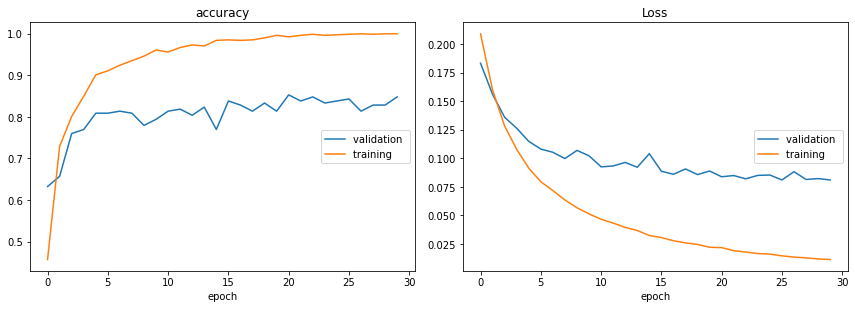

accuracy
	validation       	 (min:    0.632, max:    0.853, cur:    0.848)
	training         	 (min:    0.457, max:    1.000, cur:    1.000)
Loss
	validation       	 (min:    0.081, max:    0.183, cur:    0.081)
	training         	 (min:    0.011, max:    0.209, cur:    0.011)


In [18]:
# Optimizador (descenso del gradiente)
sgd = SGD(lr=LEARNING_RATE,
          decay=DECAY, momentum=MOMENTUM,
          nesterov=NESTEROV)

# Compilamos el modelo
model.compile(optimizer=sgd,
              loss='mse',
              metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(train_features, train_labels,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[PlotLossesKeras()],
          validation_data=(validation_features, validation_labels))

Guardar el modelo entrenado:

In [19]:
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

model.save_weights("model.h5")
print("Modelo guardado")

Modelo guardado


#**5. VALIDACIÓN**

Probamos a importar el modelo entrenado.

In [20]:
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)

loaded_model.load_weights("model.h5")
print("Modelo cargado")

Modelo cargado


Probamos el modelo con el conjunto de datos de *test*:

In [21]:
test_features, test_labels = extract_features(PATH_TEST, num_test)

Found 342 images belonging to 3 classes.


Realizamos la predicción y obtenemos las clases predecidas y las originales, revirtiendo el OneHot Encoding:

In [0]:
# Extrae la clase de un vector de probabilidades
def get_classes(classes_percents):
  classes = []
  for percents in classes_percents:
    maximum = np.amax(percents)
    if percents[0] == maximum:
      index = 0
    elif percents[1] == maximum:
      index = 1
    else:
      index = 2
    classes.append(index)
  return classes

predictions = loaded_model.predict(test_features)

predicted_classes = get_classes(predictions)
real_classes = get_classes(test_labels)

Mostramos la matriz de confusión con los resultados obtenidos:

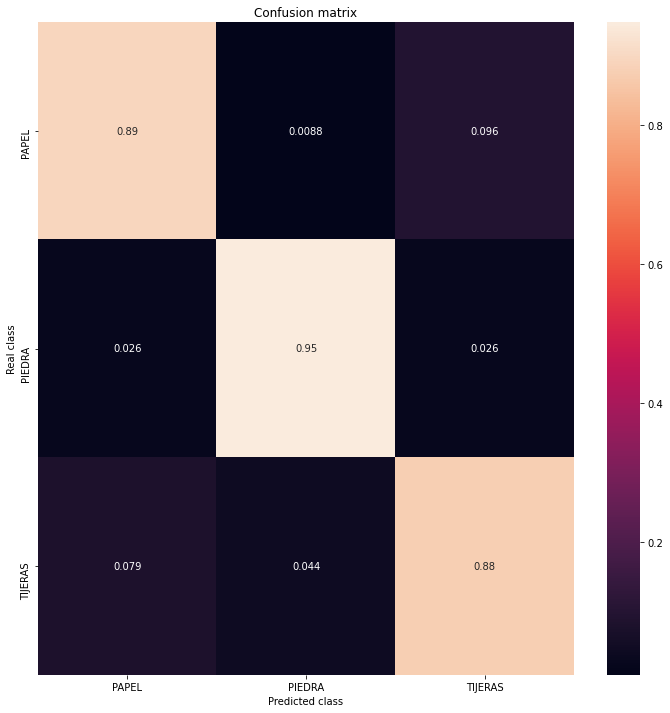

In [23]:
LABELS = ['PAPEL', 'PIEDRA', 'TIJERAS']

def show_confusion_matrix(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y, normalize='true')
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True);
    plt.title('Confusion matrix')
    plt.ylabel('Real class')
    plt.xlabel('Predicted class')
    plt.show()

show_confusion_matrix(real_classes, predicted_classes)

Finalmente, visualizamos algunas predicciones:

In [0]:
def loadImage(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [0]:
tags = {0:'papel', 1:'piedra', 2:'tijeras'}

def predictAndShow(list_of_files):

  # Get images and make predictions
  predicted_classes = []
  for file in list_of_files:
    image = loadImage(file)
    prediction = loaded_model.predict(image)
    predicted_classes.append(get_classes(prediction))

  fig = figure(figsize=(20,20))
  number_of_files = len(list_of_files)
  for i in range(1, number_of_files):
      subplot = fig.add_subplot(1,number_of_files,i)
      subplot.title.set_text('Predicted:{}'.format(tags[predicted_classes[i][0]]))
      image = imread(list_of_files[i])
      imshow(image)
      axis('off')

**Papeles**...

PAPELES


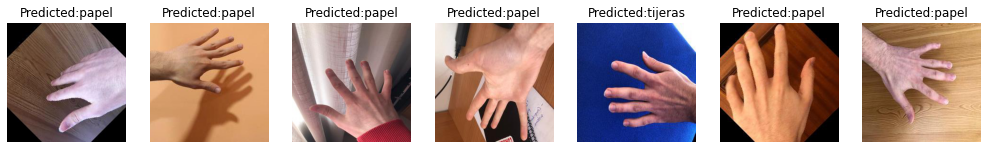

In [107]:
papeles = ls(PATH_TEST_PAPELES)
print("PAPELES")
predictAndShow(papeles[:8])

**Piedras**...

PIEDRAS


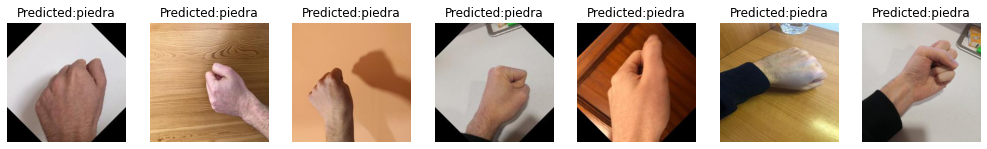

In [108]:
piedras = ls(PATH_TEST_PIEDRAS)
print("PIEDRAS")
predictAndShow(piedras[:8])

**Tijeras**...

TIJERAS


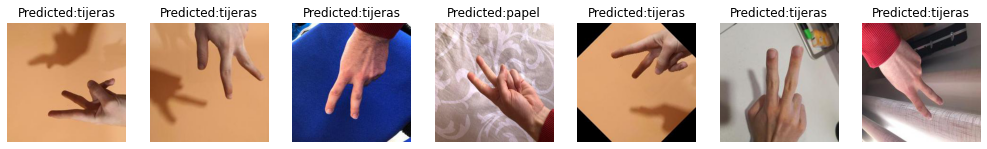

In [109]:
tijeras = ls(PATH_TEST_TIJERAS)
print("TIJERAS")
predictAndShow(tijeras[:8])